In [7]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.min_rows', 20)

In [8]:
df = pd.read_pickle("../data/clean/clean_data.pkl")



In [83]:
# Define features and target
xgb_features = ['region', 'province', 'district', 'netHabitableSurface', 'bedroomCount', 
                'hasDoubleGlazing', 'condition', 'hasSwimmingPool', 'bathroomCount',
                'showerRoomCount', 'parkingCountIndoor', 'hasGarden', 'gardenSurface', 
                'hasTerrace', 'hasLift', 'kitchen', 'latitude', 'longitude']

df = df[xgb_features + ['price']]


from sklearn.model_selection import train_test_split

X = df.drop('price', axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [17]:
df

,price,type,subtype,region,province,district,postalCode,latitude,longitude,bedroomCount,netHabitableSurface,constructionYear,condition,hasLift,kitchen,hasGarden,gardenSurface,hasTerrace,terraceSurface,fireplaceExists,hasSwimmingPool,hasAirConditioning,bathroomCount,showerRoomCount,parkingCountIndoor,heatingType,hasDoubleGlazing,saleType
0,180000.0,HOUSE,HOUSE,Flanders,Antwerp,Turnhout,2350.0,51.302538,4.883080,3.0,148.0,1955.0,TO_RENOVATE,0,NO_INFO,0,0.0,0,0.0,0,0,0,1.0,0.0,0.0,GAS,0,normalSale
1,225000.0,HOUSE,HOUSE,Flanders,Antwerp,Antwerp,2850.0,51.084302,4.385862,4.0,180.0,1956.0,AS_NEW,0,INSTALLED,0,0.0,1,0.0,0,0,0,1.0,0.0,0.0,NO_INFO,1,normalSale
2,398000.0,HOUSE,HOUSE,Flanders,West Flanders,Brugge,8200.0,51.202705,3.177086,4.0,141.0,2023.0,AS_NEW,0,SUPER_EQUIPPED,0,0.0,1,0.0,0,0,0,1.0,1.0,0.0,GAS,1,newlyBuilt
3,412000.0,HOUSE,HOUSE,Flanders,Antwerp,Antwerp,2100.0,51.223963,4.454222,4.0,209.0,1930.0,AS_NEW,0,NO_INFO,1,1.0,0,0.0,0,0,0,2.0,0.0,0.0,GAS,1,normalSale
4,365000.0,HOUSE,HOUSE,Flanders,Antwerp,Mechelen,2580.0,51.056692,4.669403,2.0,130.0,1968.0,TO_RENOVATE,0,SEMI_EQUIPPED,1,505.0,0,0.0,1,0,0,1.0,0.0,1.0,FUELOIL,0,normalSale
5,695000.0,HOUSE,EXCEPTIONAL_PROPERTY,Wallonie,Liège,Waremme,4350.0,50.697316,5.335598,5.0,240.0,1764.0,GOOD,0,INSTALLED,0,0.0,1,0.0,1,0,0,2.0,0.0,3.0,FUELOIL,1,normalSale
6,148700.0,HOUSE,HOUSE,Flanders,West Flanders,Ieper,8970.0,50.854971,2.743808,3.0,167.0,1930.0,TO_RENOVATE,0,NOT_INSTALLED,0,0.0,0,0.0,0,0,0,0.0,0.0,0.0,GAS,0,normalSale
7,395000.0,HOUSE,BUNGALOW,Flanders,East Flanders,Oudenaarde,9700.0,50.872392,3.598118,3.0,139.0,1974.0,TO_RENOVATE,0,NO_INFO,0,0.0,0,0.0,0,0,0,1.0,0.0,1.0,FUELOIL,1,normalSale
8,395000.0,HOUSE,COUNTRY_COTTAGE,Flanders,East Flanders,Oudenaarde,9600.0,50.734578,3.579045,3.0,147.0,1900.0,TO_RENOVATE,0,INSTALLED,1,0.0,1,0.0,1,0,0,1.0,0.0,2.0,FUELOIL,1,normalSale
9,299000.0,HOUSE,HOUSE,Wallonie,Luxembourg,Bastogne,6690.0,50.277078,5.910733,4.0,315.0,1930.0,JUST_RENOVATED,0,INSTALLED,1,25.0,1,20.0,0,0,0,1.0,0.0,0.0,OTHER,1,normalSale


In [102]:
df.iloc[0,:]

region                    Flanders
province                   Antwerp
district                  Turnhout
netHabitableSurface          148.0
bedroomCount                   3.0
hasDoubleGlazing                 0
condition              TO_RENOVATE
hasSwimmingPool                  0
bathroomCount                  1.0
showerRoomCount                0.0
parkingCountIndoor             0.0
hasGarden                        0
gardenSurface                  0.0
hasTerrace                       0
hasLift                          0
kitchen                    NO_INFO
latitude                 51.302538
longitude                  4.88308
constructionYear            1955.0
price                     180000.0
Name: 0, dtype: object

In [21]:
df['condition'].unique()

array(['TO_RENOVATE', 'AS_NEW', 'GOOD', 'JUST_RENOVATED', 'NO_INFO',
       'TO_BE_DONE_UP', 'TO_RESTORE'], dtype=object)

In [14]:
df[df['region'] == 'Brussels']

,price,type,subtype,region,province,district,postalCode,latitude,longitude,bedroomCount,netHabitableSurface,constructionYear,condition,hasLift,kitchen,hasGarden,gardenSurface,hasTerrace,terraceSurface,fireplaceExists,hasSwimmingPool,hasAirConditioning,bathroomCount,showerRoomCount,parkingCountIndoor,heatingType,hasDoubleGlazing,saleType
22,395000.0,HOUSE,HOUSE,Brussels,Brussels,Brussels,1030.0,50.859011,4.365417,3.0,180.0,nan,JUST_RENOVATED,0,INSTALLED,0,0.0,1,30.0,1,0,0,0.0,1.0,0.0,GAS,1,normalSale
23,395000.0,HOUSE,APARTMENT_BLOCK,Brussels,Brussels,Brussels,1210.0,50.859011,4.365417,3.0,180.0,nan,JUST_RENOVATED,0,INSTALLED,0,0.0,1,30.0,1,0,0,0.0,1.0,0.0,GAS,1,normalSale
51,420000.0,HOUSE,HOUSE,Brussels,Brussels,Brussels,1150.0,50.837578,4.431835,4.0,225.0,nan,TO_RENOVATE,0,NO_INFO,0,0.0,1,30.0,0,0,0,1.0,0.0,0.0,NO_INFO,0,normalSale
56,530000.0,HOUSE,HOUSE,Brussels,Brussels,Brussels,1160.0,50.815911,4.434367,3.0,140.0,nan,JUST_RENOVATED,0,NO_INFO,0,0.0,1,17.0,0,0,0,1.0,0.0,0.0,NO_INFO,1,normalSale
68,460000.0,HOUSE,HOUSE,Brussels,Brussels,Brussels,1210.0,50.850852,4.372073,4.0,320.0,1878.0,GOOD,0,NOT_INSTALLED,0,0.0,1,10.0,0,0,0,4.0,4.0,0.0,GAS,1,normalSale
104,699000.0,HOUSE,HOUSE,Brussels,Brussels,Brussels,1160.0,50.817796,4.414981,4.0,270.0,1931.0,JUST_RENOVATED,0,INSTALLED,1,83.0,1,0.0,0,0,0,3.0,0.0,0.0,ELECTRIC,1,normalSale
239,625000.0,HOUSE,MANSION,Brussels,Brussels,Brussels,1160.0,50.819890,4.428176,5.0,183.0,1928.0,TO_RENOVATE,0,INSTALLED,1,67.0,0,0.0,0,0,0,1.0,1.0,0.0,GAS,1,normalSale
259,649000.0,HOUSE,APARTMENT_BLOCK,Brussels,Brussels,Brussels,1070.0,50.834384,4.288616,4.0,300.0,1937.0,TO_BE_DONE_UP,0,INSTALLED,1,260.0,1,40.0,0,1,0,2.0,2.0,1.0,GAS,1,normalSale
342,345000.0,HOUSE,HOUSE,Brussels,Brussels,Brussels,1070.0,50.819071,4.293561,3.0,114.0,1930.0,NO_INFO,0,INSTALLED,1,50.0,1,15.0,0,0,0,1.0,0.0,0.0,GAS,1,normalSale
349,595000.0,HOUSE,HOUSE,Brussels,Brussels,Brussels,1070.0,50.834647,4.309315,4.0,292.0,1932.0,GOOD,0,INSTALLED,1,160.0,1,20.0,1,0,0,2.0,1.0,0.0,GAS,1,normalSale


In [85]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer



In [86]:
# numerical features
numerical_features = X_train.select_dtypes(exclude=['object']).columns
numerical_pipeline = Pipeline([('minmax', MinMaxScaler())])

In [87]:
# categorical features
categorical_features = X_train.select_dtypes(include=['object']).columns
categorical_pipeline = Pipeline([('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [88]:
transformer = ColumnTransformer(
    [("categorical_preprocessing", categorical_pipeline, categorical_features),
     ("numerical_preprocessing", numerical_pipeline, numerical_features)]
)
display(transformer)

ColumnTransformer(transformers=[('categorical_preprocessing',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 Index(['region', 'province', 'district', 'condition', 'kitchen',
       'constructionYear'],
      dtype='object')),
                                ('numerical_preprocessing',
                                 Pipeline(steps=[('minmax', MinMaxScaler())]),
                                 Index(['netHabitableSurface', 'bedroomCount', 'hasDoubleGlazing',
       'hasSwimmingPool', 'bathroomCount', 'showerRoomCount',
       'parkingCountIndoor', 'hasGarden', 'gardenSurface', 'hasTerrace',
       'hasLift', 'latitude', 'longitude'],
      dtype='object'))])

In [89]:
import xgboost as xgb


ml_pipeline = Pipeline([('preprocessing', transformer),
                        ('xgboost', xgb.XGBRegressor())])
ml_pipeline

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('categorical_preprocessing',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['region', 'province', 'district', 'condition', 'kitchen',
       'constructionYear'],
      dtype='object')),
                                                 ('numerical_preprocessing',
                                                  Pipeline(steps=[('minmax',
                                                                   MinMaxScaler())]),
                                                  Index(['netHabitable...
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=100,
                              n_jobs=None, num_parallel_tree=None,
                              predictor=None, random_state=None, ...))])

In [90]:
# ml_pipeline.predict(X)

ml_pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('categorical_preprocessing',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['region', 'province', 'district', 'condition', 'kitchen',
       'constructionYear'],
      dtype='object')),
                                                 ('numerical_preprocessing',
                                                  Pipeline(steps=[('minmax',
                                                                   MinMaxScaler())]),
                                                  Index(['netHabitable...
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=100,
                              n_jobs=None, num_parallel_tree=None,
                              predictor=None, random_state=None, ...))])

In [91]:
import pickle

with open('columntransformer.pkl', 'wb') as f:
    pickle.dump(ml_pipeline, f)

In [92]:
with open('columntransformer.pkl', 'rb') as f:
    reloaded_ml_pipeline = pickle.load(f)

In [93]:
reloaded_ml_pipeline

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('categorical_preprocessing',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['region', 'province', 'district', 'condition', 'kitchen',
       'constructionYear'],
      dtype='object')),
                                                 ('numerical_preprocessing',
                                                  Pipeline(steps=[('minmax',
                                                                   MinMaxScaler())]),
                                                  Index(['netHabitable...
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=100,
                              n_jobs=None, num_parallel_tree=None,
                              predictor=None, random_state=None, ...))])

In [94]:
y_pred = ml_pipeline.predict(X_test)

In [95]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
display(mse, r2)

4716309573.50518

0.706390125813324

In [96]:
from sklearn.model_selection import cross_validate 
cv_results = cross_validate(reloaded_ml_pipeline, X, y, scoring=['neg_mean_squared_error', 'r2'], return_train_score=True)
cv_results

{'fit_time': array([1.24507594, 1.35810781, 1.18268108, 1.26444912, 1.19102073]),
 'score_time': array([0.01812625, 0.01939607, 0.02002001, 0.01967001, 0.01801705]),
 'test_neg_mean_squared_error': array([-7.28110073e+09, -7.27533337e+09, -4.56646100e+09, -3.37626280e+09,
        -3.25941425e+09]),
 'train_neg_mean_squared_error': array([-1.74495947e+09, -1.80380664e+09, -2.07992700e+09, -2.41837815e+09,
        -2.25492944e+09]),
 'test_r2': array([0.64790208, 0.65739083, 0.7002399 , 0.69169366, 0.70299042]),
 'train_r2': array([0.88582899, 0.88158637, 0.87785832, 0.86530809, 0.87397001])}

In [97]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(reloaded_ml_pipeline, X, y)
print(f"Mean accuracy: {scores.mean():.2f}+/-{scores.std():.2f}")

Mean accuracy: 0.68+/-0.02


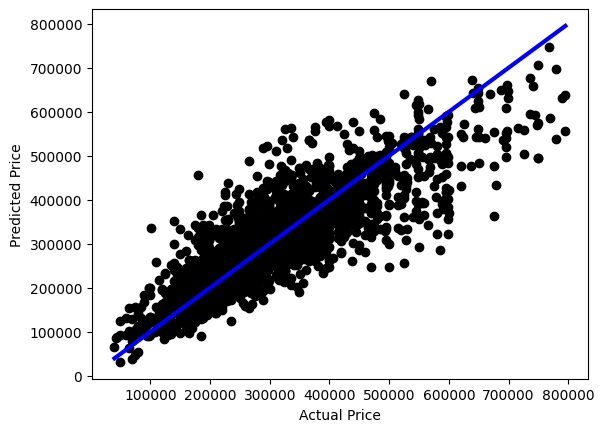

In [98]:
import matplotlib.pyplot as plt


y_pred = reloaded_ml_pipeline.predict(X_test)



# Make scatter plot of actual prices vs predicted prices
plt.scatter(y_test, y_pred, color="black")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="blue", linewidth=3)

plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")

plt.show()

In [99]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer

from sklearn.pipeline import Pipeline


def encode_categorical_columns(df):

    encoder = OneHotEncoder()
    categorical_col = df.select_dtypes(include=['object']).columns

    # fit and transform the categorical data into a sparse matrix
    encoded_data = encoder.fit_transform(df[categorical_col])

    # convert into a dense array
    encoded_array = encoded_data.toarray()

    encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(categorical_col))

    df = df.drop(columns=categorical_col)
    df_encoded = pd.concat([df.reset_index(drop=True), encoded_df], axis=1)

    return df_encoded



encode_categorical = FunctionTransformer(encode_categorical_columns, validate=False)



In [100]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import xgboost as xgb
from random import *
import pandas as pd
import numpy as np
from pathlib import Path
from sklearn.preprocessing import OneHotEncoder





def split_train_test(df):
    X, y = df.drop('price', axis=1), df['price']
    X_train, X_test, y_train, y_test = train_test_split(X, y)

    return X_train, X_test, y_train, y_test


def scale_features(X_train, X_test):

    scaler = MinMaxScaler()
    scaled_X_train = scaler.fit_transform(X_train)
    scaled_X_test = scaler.transform(X_test)

    df_scaled_X_train = pd.DataFrame(scaled_X_train, columns=X_train.columns)
    df_scaled_X_test = pd.DataFrame(scaled_X_test, columns=X_test.columns)

    return df_scaled_X_train, df_scaled_X_test




def xgb_train_eval(X_train, X_test, y_train, y_test):

    # scale features
    scaled_X_train, scaled_X_test = scale_features(X_train, X_test)

    model = xgb.XGBRegressor()
    model.fit(scaled_X_train, y_train)
    y_pred = model.predict(scaled_X_test)

    print(f'    XGBOOST REGRESSION model:')
    print("        Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
    print("        Training score: %.2f" % model.score(scaled_X_train, y_train))
    print("        Test score: %.2f" % model.score(scaled_X_test, y_test))


def xgb_reg(df):
    X_train, X_test, y_train, y_test = split_train_test(df)
    xgb_train_eval(X_train, X_test, y_train, y_test)


def main_xgb(df):
    xgb_features = ['price', 'region', 'province', 'district', 'netHabitableSurface', 'bedroomCount', 'hasDoubleGlazing', 'condition', 'hasSwimmingPool', 'bathroomCount',
                    'showerRoomCount', 'parkingCountIndoor', 'hasGarden', 'gardenSurface', 'hasTerrace', 'hasLift', 'kitchen', 'latitude', 'longitude', 'constructionYear']

    df = df[xgb_features]


    df = encode_categorical_columns(df)

    xgb_reg(df)

